# NUSTAR SCIENTIFIC PRODUCTS EXTRACTION

This notebook contains the set of cells which extract the NUSTAR scientific products from the raw data and prepares the data for further analysis ( phase-resolved  spectroscopy).

First, import necessary classes and functions from `nustar_scripts` folder in the root

In [1]:
import sys
sys.path.append('../../')
from nustar_scripts.nu_class import np, plt, os, glob, NustarObservation
import matplotlib
%matplotlib inline
from nustar_scripts.pulsar_init import Nu_path, ObsList_bright, ObsList, periods_val


In [2]:
print(ObsList)

['90302319002', '90302319004', '90302319006', '90302319008', '90401308002', '90401334002', '90501310002']


## Choose the  ObsID you want to work with 

by setting ``` ObsID=ObsList[<index>] ```  or by  setting it by  your value, e.g.   ```ObsID = '90201041002'```

I  advice that you create a seperate notebook for each ObsID (by copying this one), so that you can check for  errors or rerun the analysis if necessary for separate observations.

Set the value for period in phase-resolved spectroscopy and the number of phase-bins.

Also we need to define the folder which is used for GTI (good time intervals) creation  based on barycentrically corrected lightcurves.

In [3]:
ObsID =  ObsList[0] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
period = periods_val[ObsID]
n_bins = 10
print(f"ObsID: {ObsID}; period: {period}; n_bins: {n_bins}")

prodpath_ave = 'spe_and_lc' #from light curves in this folder we will make GTIs

###
Observation 90302319002 loaded successfully
ObsID: 90302319002; period: 9.85425; n_bins: 10


------

## phase-resolved scientific products extraction
extracts spectra and light curves from both modules in each phase bin. 



### GTI creation 

1. Run the cell and then follow instructions one cell below. It would produce GTI intervals for phase-resolved products and the commands for `nuprooducts`.
2. Check for the produced plot which i) plots the phase of a time bin as a function of time and ii) plots the lightcurve with colors indicating the phase of the time bin. All times are in original time value of a light curve (i.e. withut barycentric and/or orbital corrections). The former plot should look like a saw, and the latter should look like a pulse profile with the phase of the time bin indicated by the color.

['gtis/gti_2A.fits', 'gtis/gti_4A.fits', 'gtis/gti_8B.fits', 'gtis/gti_6A.fits', 'gtis/gti_1A.fits', 'gtis/gti_3A.fits', 'gtis/gti_10B.fits', 'gtis/gti_7A.fits', 'gtis/gti_5A.fits', 'gtis/gti_9B.fits', 'gtis/gti_5B.fits', 'gtis/gti_9A.fits', 'gtis/gti_7B.fits', 'gtis/gti_3B.fits', 'gtis/gti_10A.fits', 'gtis/gti_1B.fits', 'gtis/gti_6B.fits', 'gtis/gti_4B.fits', 'gtis/gti_8A.fits', 'gtis/gti_2B.fits']
GTIs have been created for module(s) AB with period 9.85425 and 10 bins


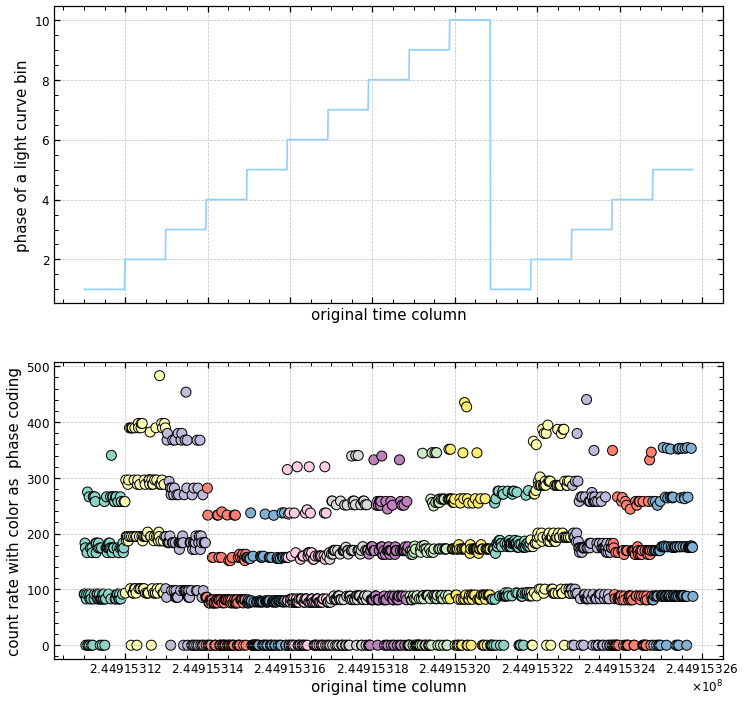

In [4]:
prodpath_ph_res = 'phase_resolved'  #folder name for phase resolved products
nu_obs.make_gti_from_lc(prodpath=prodpath_ave, mode='AB', period=period, phase_bins=n_bins, outfolder = 'gtis/' )



### Phase-resolved products
1. Run the following cell to create a script which extracts the phase-resolved (per phase bin) products from the raw data.
2. Go to `out{ObsID}/products/` and run the scripts `phase_resolvedA.sh` and `phase_resolvedB.sh`. Running those sripts may take some time.

Check the terminal window for errors. If necessary, rerun the script for problematicc bins.

In [5]:

for mode in ['A','B']:
    nu_obs.phase_resolved_spectra(gtipath=prodpath_ave+'/gtis', mode=mode, folder='phase_resolved');

os.chdir(prodpath_ph_res)


start  phase resolved spectra scripts
Creating command command: 
    nuproducts     indir=/Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319002     instrument=FPMA     steminputs=nu90302319002     stemout=phase_resolved_bin1A     outdir=phase_resolved     srcregionfile=/Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319002/srcA.reg     bkgextract=yes     bkgregionfile=/Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319002/bkgA.reg     binsize=0.01     lcfile=DEFAULT     phafile=DEFAULT     bkglcfile=DEFAULT     bkgphafile=DEFAULT     imagefile=DEFAULT     usrgtifile=/Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319002/products/spe_and_lc/gtis/gti_1A.fits     pilow=60 pihigh=1935     lcenergy=10     usrgtibarycorr=no    runmkarf=yes    runmkrmf=yes
Writing to file:  phase_resolvedA
Creating command command: 
    nuproducts     indir=/Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_product

 This little fucntion make a list of products filenames, such as the names of spectral files of each phase, light curves of each phase, etc

In [11]:

lclist, lclist_bary, lclistorb_corr, spelist, propname_per_bin = scan_phase_resolved_products(prodpath=prodpath_ph_res, n_phase = 10)


### sum all thee lightcurves, barycenter them, and correct for orbital motion


In [12]:

for pair in lclist:
    binnum = pair[0].split('_')[2][3:-1]
    nu_obs.lcmath(infiles=pair, outfile=f'phase_resolved_bin{binnum}AB_sr.lc', prodpath=prodpath_ph_res, cmd_name='lcmath_orig', rewrite=False)

for pair in propname_per_bin(['AB'], postfix = 'lc'):
    nu_obs.barycorr(infiles=pair, prodpath=prodpath_ph_res, barytime='no', rewrite=False)


Creating command command: 
        lcmath         infile=phase_resolved_bin1A_sr.lc         bgfile = phase_resolved_bin1B_sr.lc         outfile = phase_resolved_bin1AB_sr.lc         multi = 0.5         multb = 0.5         addsubr = yes
        
Writing to file:  lcmath_orig
Creating command command: 
        lcmath         infile=phase_resolved_bin2A_sr.lc         bgfile = phase_resolved_bin2B_sr.lc         outfile = phase_resolved_bin2AB_sr.lc         multi = 0.5         multb = 0.5         addsubr = yes
        
Writing to file:  lcmath_orig
Creating command command: 
        lcmath         infile=phase_resolved_bin3A_sr.lc         bgfile = phase_resolved_bin3B_sr.lc         outfile = phase_resolved_bin3AB_sr.lc         multi = 0.5         multb = 0.5         addsubr = yes
        
Writing to file:  lcmath_orig
Creating command command: 
        lcmath         infile=phase_resolved_bin4A_sr.lc         bgfile = phase_resolved_bin4B_sr.lc         outfile = phase_resolved_bin4AB_sr.lc  

In [13]:

for pair in propname_per_bin(['AB'], postfix = 'lc_bary'):
    nu_obs.orb_correction_lc(
    filename=pair[0], prodpath=prodpath_ph_res)


no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes
no orbital parameters given, copying the original file without changes


### make pulse profiles of each phase bin. Needed to check if the phases are correctly set


In [14]:
for pair in propname_per_bin(['AB'], postfix = 'lc_bary_orb_corr'):
    nu_obs.make_efold(filename = pair[0], prodpath = prodpath_ph_res, period = period, cmd_name='efold', nphase='128', rewrite=False)

Creating command command: 
            efold             nser = 1             norm = 0             cfile1 = phase_resolved_bin1AB_sr.lc_bary_orb_corr             dper = 9.8234             nphase = 128             nbint = INDEF             nintfm = INDEF             outfileroot = 'default'             window = '-'             sepoch = 0             plot = no              outfile = phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold
Writing to file:  efold
Creating command command: 
            efold             nser = 1             norm = 0             cfile1 = phase_resolved_bin2AB_sr.lc_bary_orb_corr             dper = 9.8234             nphase = 128             nbint = INDEF             nintfm = INDEF             outfileroot = 'default'             window = '-'             sepoch = 0             plot = no              outfile = phase_resolved_bin2AB_sr.lc_bary_orb_corr_nphase_128.efold
Writing to file:  efold
Creating command command: 
            efold             nser = 1   

### check if thee pulse profile of phases are consequal and do not overlap

In [15]:
efolds = propname_per_bin(modes = ['AB'], postfix='lc_bary_orb_corr_nphase_128.efold')
nu_obs.check_efold_of_bins(efolds_files=reduce_list(efolds),prodpath=prodpath_ph_res, fiducial = '../spe_and_lc/spe_and_lcAB_sr.lc_bary_orb_corr_nphase_128.efold')

working with phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin2AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin3AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin4AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin5AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin6AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin7AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin8AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin9AB_sr.lc_bary_orb_corr_nphase_128.efold
working with phase_resolved_bin10AB_sr.lc_bary_orb_corr_nphase_128.efold
/Users/sdbykov/work/my_packages/nustar_pipeline/nustar_pipeline/nustar_obs_class.py:560: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


In [ ]:
#light_curves = propname_per_bin(modes = ['AB'], postfix='lc_bary_orb_corr')
#nu_obs.check_lightcurve_of_bins(lc_files=reduce_list(light_curves),prodpath=prodpath_ph_res, fiducial = '../spe_and_lc/spe_and_lcAB_sr.lc_bary_orb_corr')


### group spectral files

In [16]:
for pair in propname_per_bin(['A','B'], postfix = 'pha'):
    nu_obs.grppha(infiles=pair, prodpath=prodpath_ph_res, group_min=25)


Creating command command: grppha infile="phase_resolved_bin1A_sr.pha" outfile="phase_resolved_bin1A_sr.pi"  comm="group min 25 & exit" clobber=yes
Writing to file:  grppha
Creating command command: grppha infile="phase_resolved_bin1B_sr.pha" outfile="phase_resolved_bin1B_sr.pi"  comm="group min 25 & exit" clobber=yes
Writing to file:  grppha
Creating command command: grppha infile="phase_resolved_bin2A_sr.pha" outfile="phase_resolved_bin2A_sr.pi"  comm="group min 25 & exit" clobber=yes
Writing to file:  grppha
Creating command command: grppha infile="phase_resolved_bin2B_sr.pha" outfile="phase_resolved_bin2B_sr.pi"  comm="group min 25 & exit" clobber=yes
Writing to file:  grppha
Creating command command: grppha infile="phase_resolved_bin3A_sr.pha" outfile="phase_resolved_bin3A_sr.pi"  comm="group min 25 & exit" clobber=yes
Writing to file:  grppha
Creating command command: grppha infile="phase_resolved_bin3B_sr.pha" outfile="phase_resolved_bin3B_sr.pi"  comm="group min 25 & exit" clobb